# House Prices - Advanced Regression Techniques 

In [1]:
%load_ext autoreload
%autoreload 2

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Steps
- EDA
- Feature Engineering
- Baseline Models
- Hyperparam Tuning

# EDA

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [7]:
df.isna().sum().sort_values(ascending=False).head(20)/df.shape[0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

<Figure size 432x288 with 0 Axes>

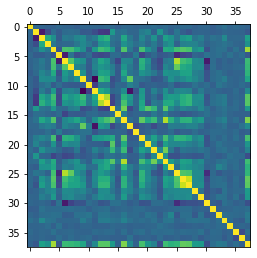

In [8]:
plt.clf()
plt.matshow(df.corr())
plt.show()

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).drop("SalePrice", axis=1).apply(lambda x: abs(x.corr(df["SalePrice"]))).sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
dtype: float64

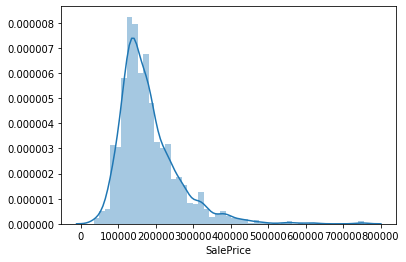

In [10]:
plt.clf()
sns.distplot(df.SalePrice)
plt.show()

In [11]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [13]:
df.select_dtypes(include='object').nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [14]:
df["Condition1"].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [15]:
quality_cols = [i for i in df.select_dtypes(include='object').columns.to_list() if 'Qual' in i]

for col in quality_cols:
    print(df[col].unique())

['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' nan 'Fa']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


# Feature Eng

In [16]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [17]:
scaler = StandardScaler()

In [18]:
# select quality features
quality_cols = [i for i in df.select_dtypes(include='object').columns.to_list() if 'Qual' in i]

# select number of features to use as input
n_features=1000
numeric_cols = df.select_dtypes(include=numerics)\
                      .drop("SalePrice", axis=1)\
                      .apply(lambda x: abs(x.corr(df["SalePrice"])))\
                      .sort_values(ascending=False).head(n_features).index.to_list()

selected_features = numeric_cols + quality_cols

targetcol = 'SalePrice'

In [19]:
X = df.loc[:, selected_features].copy()
y = df[targetcol].copy()

In [20]:
#impute missing values if missing numerics
from sklearn.impute import SimpleImputer

cols_missing = X[numeric_cols].columns[X[numeric_cols].isnull().any()].tolist()
imp = SimpleImputer()
X[cols_missing] = imp.fit_transform(X[cols_missing])

In [21]:
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [22]:
X[quality_cols] = X[quality_cols].fillna(X[quality_cols].mode().iloc[0])

In [23]:
#Ordinal encode
oe = OrdinalEncoder()

X[quality_cols] = oe.fit_transform(X[quality_cols])

# for col in quality_cols:
#     print(col)
#     df[col] = oe.fit_transform(df[col])

# Baselines

In [24]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, plot_roc_curve, mean_absolute_error

In [25]:
def train_baseline(model, X, y):
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)
    
    #fit
    model.fit(X_train, y_train)
    
#     #preprocess
#     oe = OrdinalEncoder()

#     X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
#     X_test[quality_cols] = oe.fit_transform(X_test[quality_cols])
    
    #predict
    y_pred = model.predict(X_test)
    
    #metrics
    mse = mean_squared_error(y_test, y_pred, squared=False)    
    mae = mean_absolute_error(y_test, y_pred)
    
    #show metrics
    print(f"mse: {round(mse,4)}")
    print(f"mae: {round(mae,4)}")

### LogReg

In [26]:
train_baseline(LogisticRegression(solver='lbfgs', max_iter=1000), X, y)

mse: 61450.214
mae: 31726.6301


### RF

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
train_baseline(RandomForestRegressor(), X, y)

mse: 28457.8414
mae: 17145.4583


### SVR

In [29]:
from sklearn.svm import SVR

In [30]:
train_baseline(SVR(), X, y)

mse: 87722.1333
mae: 57352.8642


## XGBoost

In [36]:
from xgboost import XGBRegressor

In [37]:
train_baseline(XGBRegressor(), X, y)

[11:59:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mse: 28833.649
mae: 16636.4343


# Hyperparam Tuning

In [31]:
from sklearn.model_selection import KFold

In [32]:
def tune(model, X, y, params):
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)
    
    #Hyperparam tuning
    cvv = KFold(5)
    gc = RandomizedSearchCV(model, 
                            param_distributions=params, 
                            cv =cvv, 
                            n_jobs=-1, 
                            return_train_score = True, 
                            iid=False)
    gc.fit(X, y)
    
#     if verbose:
#         print(f"CV results {gc.cv_results_}")
#         print(f"Best estimator {gc.best_estimator_}")
    
    y_pred = gc.best_estimator_.predict(X_test)
    
    #metrics
    mse = mean_squared_error(y_test, y_pred, squared=False)    
    mae = mean_absolute_error(y_test, y_pred)
    
    #show metrics
    print(f"mse: {round(mse,4)}")
    print(f"mae: {round(mae,4)}")
    
    return gc

In [33]:
#LR
params={'C':np.arange(0,1,.2), 'l1_ratio':np.arange(0,1,.1)}
lr=tune(LogisticRegression(solver='lbfgs', max_iter=1000), X, y, params)

mse: 23602.4305
mae: 13145.0068


In [34]:
#RF
params={'n_estimators':[100,200,500], 'max_depth':[1,5,10,None]}
rf = tune(RandomForestRegressor(), X, y, params)

mse: 10906.5772
mae: 7734.9577


In [35]:
#SVR
params={'gamma':['scale', 'auto'], 'degree':[3,4,5]}
svr = tune(SVR(), X, y, params)

mse: 87764.9833
mae: 57334.7892


In [43]:
#XGBoost
params={'eta':np.arange(0,1,.1), 
        'gamma':[0,.1,.25,.5,.75,1], 
        'max_depth':[1,5,10,None], 
        'min_child_weight':[0,1,5,10,None]}
xgb = tune(XGBRegressor(), X, y, params)

[12:02:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mse: 1165.0381
mae: 816.8441


## Retrain on all data and create sub

In [44]:
# train on all data
rf_est = xgb.best_estimator_
rf_est.fit(X, y)

[12:02:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.30000000000000004,
             gamma=0.5, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=10, min_child_weight=0, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [45]:
test = pd.read_csv("test.csv")
ids = test["Id"]
test = test[selected_features]

#impute missing values if missing numerics
imp = SimpleImputer()
cols_missing = test[numeric_cols].columns[test[numeric_cols].isnull().any()].tolist()
test[cols_missing] = imp.fit_transform(test[cols_missing])
test[quality_cols] = test[quality_cols].fillna(test[quality_cols].mode().iloc[0])

test[numeric_cols] = scaler.transform(test[numeric_cols])
test[quality_cols] = oe.fit_transform(test[quality_cols])

In [46]:
final_preds = pd.DataFrame()
final_preds["Id"] = ids
final_preds[targetcol] = rf_est.predict(test)

In [47]:
final_preds.to_csv("submission.csv", index=False)

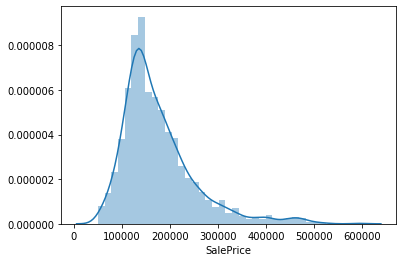

In [48]:
plt.clf()
sns.distplot(final_preds.SalePrice)
plt.show()